In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
df = pd.read_csv('AUC.csv')
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [223]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')

In [224]:
df.duplicated().sum()

0

In [225]:
df.isnull().sum()

,0
name,0
author,0
narrator,0
time,0
releasedate,0
language,0
stars,0
price,0


In [226]:
df['author'].unique()

array(['Writtenby:GeronimoStilton', 'Writtenby:RickRiordan',
       'Writtenby:JeffKinney', ..., 'Writtenby:RogerW.Thompson',
       'Writtenby:ChrisStewart', "Writtenby:StephenO'Shea"], dtype=object)

In [227]:
df['author'] = df['author'].str.replace('Writtenby:', '', regex=False)
df['author']

,author
0,GeronimoStilton
1,RickRiordan
2,JeffKinney
3,RickRiordan
4,RickRiordan
...,...
87484,ChrisStewart
87485,StephenO'Shea
87486,MarkTwain
87487,LaurenceSterne


In [228]:
df.dtypes

,0
name,object
author,object
narrator,object
time,object
releasedate,object
language,object
stars,object
price,object


In [229]:
df['time'].unique()

array(['2 hrs and 20 mins', '13 hrs and 8 mins', '2 hrs and 3 mins', ...,
       '40 hrs and 58 mins', '24 hrs and 8 mins', '24 hrs and 4 mins'],
      dtype=object)

In [230]:
def convert_to_minutes(time_str):
    time_str = str(time_str)
    hours, minutes = 0, 0

    if "hrs" in time_str:
        hours = int(time_str.split(" hrs")[0])
    if "mins" in time_str:
        minutes = int(time_str.split(" and ")[-1].split(" mins")[0])

    return hours * 60 + minutes

df['time'] = df['time'].apply(convert_to_minutes)
df.rename(columns={'time': 'Total Minutes'}, inplace=True)

In [231]:
df

,name,author,narrator,Total Minutes,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,140,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,788,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,123,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,676,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,600,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,Narratedby:ChrisStewart,454,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,Narratedby:RobertFass,607,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,Narratedby:FloGibson,1144,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,Narratedby:AntonLesser,248,23-02-11,English,Not rated yet,680.00


In [232]:
df['narrator'] = df['narrator'].str.replace('Narratedby:', '', regex=False)
df['narrator']

,narrator
0,BillLobely
1,RobbieDaymond
2,DanRussell
3,SoneelaNankani
4,JesseBernstein
...,...
87484,ChrisStewart
87485,RobertFass
87486,FloGibson
87487,AntonLesser


In [233]:
df['releasedate'].unique()

array(['04-08-08', '01-05-18', '06-11-20', ..., '03-02-06', '13-02-01',
       '08-04-04'], dtype=object)

In [234]:
df.dtypes

,0
name,object
author,object
narrator,object
Total Minutes,int64
releasedate,object
language,object
stars,object
price,object


In [235]:
df.rename(columns={'name': 'Name','author':'Author','narrator':'Narrator','releasedate':'Release Date','language':'Language','stars':'Stars','price':'Price'}, inplace=True)

In [236]:
df.dtypes

,0
Name,object
Author,object
Narrator,object
Total Minutes,int64
Release Date,object
Language,object
Stars,object
Price,object


In [237]:
df['Star Rating'] = df['Stars'].str.extract(r'(\d+(\.\d+)?) out of 5 stars')[0]
df['Star Rating'] = df['Star Rating'].fillna("Not Rated Yet")
df['Star Rating'] = df['Star Rating'].apply(lambda x: f"{x} out of 5.0" if x != "Not Rated Yet" else x)
df['User Ratings Count'] = df['Stars'].str.extract(r'(\d+) ratings')[0]
df['User Ratings Count'] = df['User Ratings Count'].fillna(0).astype(int)
df.drop(columns=['Stars'], inplace=True)

In [238]:
df

,Name,Author,Narrator,Total Minutes,Release Date,Language,Price,Star Rating,User Ratings Count
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,04-08-08,English,468.00,5 out of 5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,01-05-18,English,820.00,4.5 out of 5.0,41
2,The Deep End,JeffKinney,DanRussell,123,06-11-20,English,410.00,4.5 out of 5.0,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,05-10-21,English,615.00,4.5 out of 5.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,13-01-10,English,820.00,4.5 out of 5.0,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,09-03-17,English,596.00,Not Rated Yet,0
87485,The Alps,StephenO'Shea,RobertFass,607,21-02-17,English,820.00,Not Rated Yet,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,30-12-16,English,938.00,Not Rated Yet,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,23-02-11,English,680.00,Not Rated Yet,0


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                87489 non-null  object
 1   Author              87489 non-null  object
 2   Narrator            87489 non-null  object
 3   Total Minutes       87489 non-null  int64 
 4   Release Date        87489 non-null  object
 5   Language            87489 non-null  object
 6   Price               87489 non-null  object
 7   Star Rating         87489 non-null  object
 8   User Ratings Count  87489 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.0+ MB


<Axes: xlabel='Star Rating'>

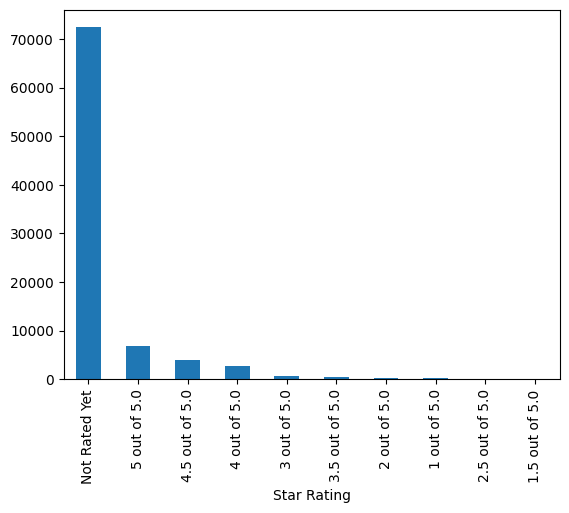

In [240]:
df['Star Rating'].value_counts().plot(kind='bar')

<ipython-input-241-4a39927189c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Minutes'])


<Axes: xlabel='Total Minutes', ylabel='Density'>

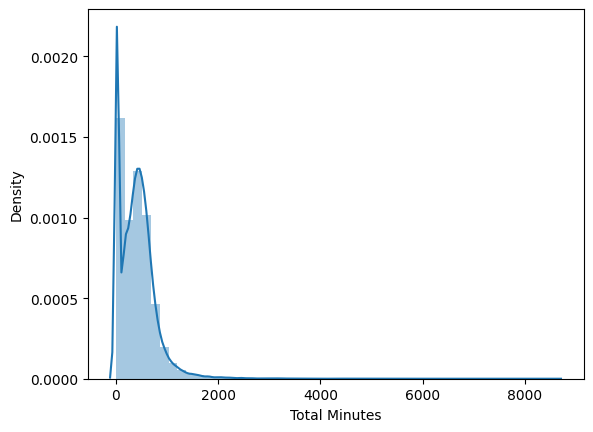

In [241]:
sns.distplot(df['Total Minutes'])

In [242]:
df.isnull().sum()

,0
Name,0
Author,0
Narrator,0
Total Minutes,0
Release Date,0
Language,0
Price,0
Star Rating,0
User Ratings Count,0


In [243]:
df['Price'] = df['Price'].astype(str).str.replace(',', '').str.replace('Free', '0').astype(float)

In [244]:
df.isnull().sum()

,0
Name,0
Author,0
Narrator,0
Total Minutes,0
Release Date,0
Language,0
Price,0
Star Rating,0
User Ratings Count,0


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                87489 non-null  object 
 1   Author              87489 non-null  object 
 2   Narrator            87489 non-null  object 
 3   Total Minutes       87489 non-null  int64  
 4   Release Date        87489 non-null  object 
 5   Language            87489 non-null  object 
 6   Price               87489 non-null  float64
 7   Star Rating         87489 non-null  object 
 8   User Ratings Count  87489 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 6.0+ MB


In [246]:
df['Author'].unique()

array(['GeronimoStilton', 'RickRiordan', 'JeffKinney', ...,
       'RogerW.Thompson', 'ChrisStewart', "StephenO'Shea"], dtype=object)